In [ ]:
import seaborn as sns
import networkx as nx
import operator
from tqdm import tqdm_notebook as tqdm

# Load Data

In [2]:
df= pd.read_csv("../data/wsdata.csv")

In [3]:
df.head()

,AF,TI,SO,DT,DE,ID,AB,FU,CR,PY,UT
0,"Jesus Madera-Santana, Tomas; Hernan Herrera-Me...",An overview of the chemical modifications of c...,GREEN MATERIALS,Review,applications; biopolymer; chitosan,"QUATERNARY AMMONIUM-SALT; N,N,N-TRIMETHYL CHIT...","The use of chitosan, a natural polymer, has re...",Consejo Nacional de Ciencia y Tecnologia (Cona...,"Benediktsdottir BE, 2011, CARBOHYD POLYM, V86,...",2018.0,WOS:000453846300001
1,"Rahmati, Maryam; Mozafari, Masoud",Protein adsorption on polymers,MATERIALS TODAY COMMUNICATIONS,Article,Protein adsorption; Biocompatibility; Cell res...,CELL-ADHESION; COMPLEMENT ACTIVATION; EXTRACEL...,Although a promising progress has been recentl...,NaN,"Adamczak M, 2011, ACTA BIOENG BIOMECH, V13, P6...",2018.0,WOS:000453844500058
2,"Ma, Chi; Chang, Bei; Jing, Yan; Kim, Harry; Li...",Bio-Inspired Micropatterned Platforms Recapitu...,ADVANCED SCIENCE,Article,3D; cell morphology; micropatterns; odontoblas...,SOFT LITHOGRAPHY; DIFFERENTIATION; REGENERATIO...,Cells exhibit distinct 3D morphologies in vivo...,NIH/NIDCR [R01DE024979],"Bonewald LF, 2011, J BONE MINER RES, V26, P229...",2018.0,WOS:000453685900006
3,"Gide, Mussie; Nimmagadda, Alekhya; Su, Ma; Wan...",Nano-Sized Lipidated Dendrimers as Potent and ...,MACROMOLECULAR RAPID COMMUNICATIONS,Article,amphipathic; asymmetric; dendrimers; host defe...,HOST-DEFENSE PEPTIDE; GAMMA-AAPEPTIDES; SYNTHE...,There is considerable interest in the developm...,NSF [1708500]; International Cooperation Key P...,"Bjarnsholt T, 2013, NAT REV DRUG DISCOV, V12, ...",2018.0,WOS:000453779200002
4,"Xu, Jing-Wen; Ge, Xin; Lv, Li-Hua; Xu, Feng; L...",Dual-Stimuli-Responsive Paclitaxel Delivery Na...,MACROMOLECULAR RAPID COMMUNICATIONS,Article,biomaterials; conjugated polymers; micelles; s...,POLY(ETHYLENE GLYCOL); MICELLES; REDOX; PH; NA...,Diselenide-bond-linked poly(N-isopropylacrylam...,Fundamental Research Funds for the Central Uni...,"Chen W, 2013, J CONTROL RELEASE, V169, P171, D...",2018.0,WOS:000453779200010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45977 entries, 0 to 45976
Data columns (total 11 columns):
AF    45977 non-null object
TI    45977 non-null object
SO    45977 non-null object
DT    45977 non-null object
DE    33487 non-null object
ID    42298 non-null object
AB    43513 non-null object
FU    26199 non-null object
CR    44278 non-null object
PY    45977 non-null float64
UT    45977 non-null object
dtypes: float64(1), object(10)
memory usage: 3.9+ MB


## Distribution based on Year

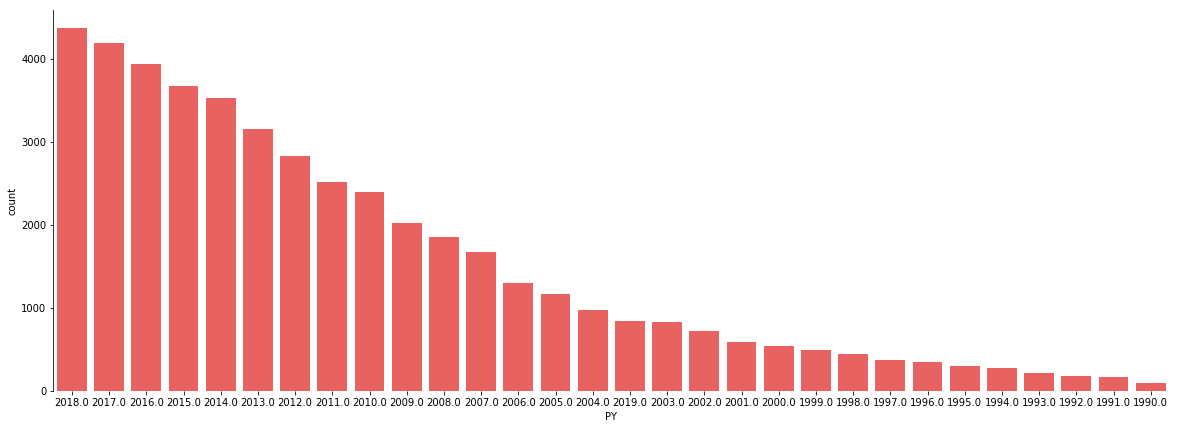

In [18]:
fig, ax = plt.subplots(figsize=(20,7))
ax=sns.countplot(x = "PY", data = df,\
             order = df['PY'].value_counts().index,color='r',alpha=0.7)
sns.despine()
ax.spines['bottom'].set_visible(False)
#for p in ax.patches:
#    ax.annotate('{:}'.format(p.get_width()), (p.get_width()+20, p.get_y()),va="top")
#plt.title("Product Distribution")
#plt.savefig("product.jpg", bbox_inches="tight")
plt.show();

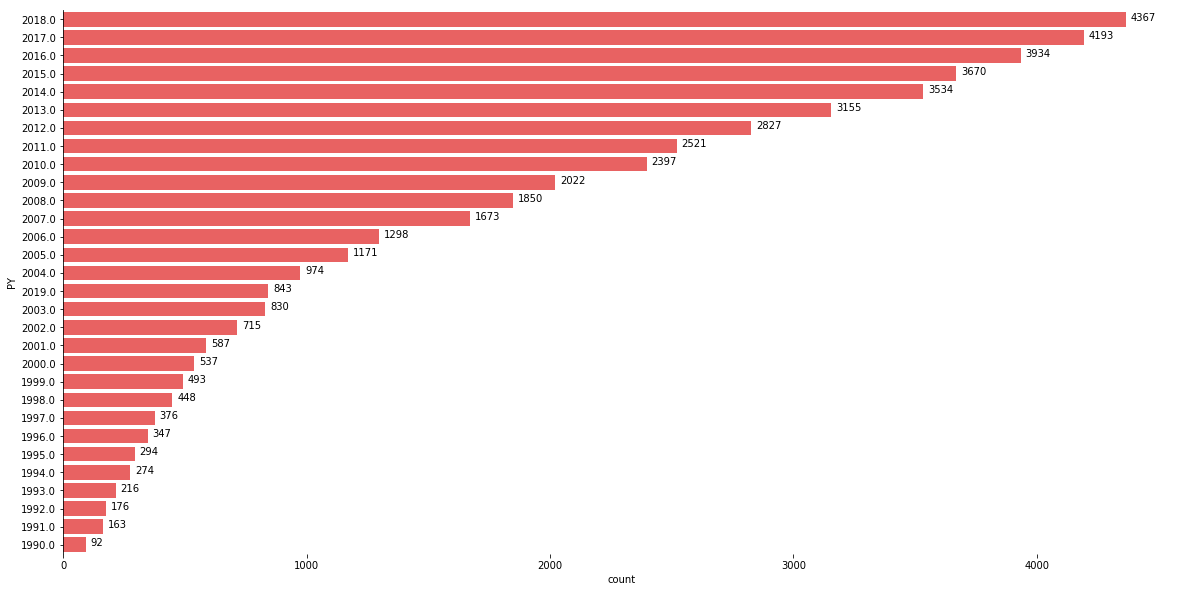

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.countplot(y = "PY", data = df,\
             order = df['PY'].value_counts().index,color='r',alpha=0.7)
sns.despine()
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width()+20, p.get_y()),va="top")
#plt.title("Product Distribution")
#plt.savefig("product.jpg", bbox_inches="tight")
plt.show();

## Extract data in specific year

In [136]:
df1=df[df['PY']==2016]

In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 2362 to 41477
Data columns (total 11 columns):
AF    3934 non-null object
TI    3934 non-null object
SO    3934 non-null object
DT    3934 non-null object
DE    2920 non-null object
ID    3760 non-null object
AB    3813 non-null object
FU    2973 non-null object
CR    3847 non-null object
PY    3934 non-null float64
UT    3934 non-null object
dtypes: float64(1), object(10)
memory usage: 368.8+ KB


In [138]:
df1.AF.head()

2362    Blehm, Benjamin H.; Devine, Alexus; Staunton, ...
2363    Wang, Xiaojian; Xu, Shanqing; Zhou, Shiwei; Xu...
2364    Crowley, Claire; KlanritB, Poramate; Butler, C...
2365    Andre, Emilie M.; Passirani, Catherine; Seijo,...
2366    Tang, Daniel; Tare, Rahul. S.; Yang, Liang-Yo;...
Name: AF, dtype: object

In [139]:
df1.AF[2362]

'Blehm, Benjamin H.; Devine, Alexus; Staunton, Jack R.; Tanner, Kandice'

## Extract authors

In [140]:
df1_author=df1.AF.str.split(';', expand=True).add_prefix('au')

In [141]:
df1_author.head()

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au29,au30,au31,au32,au33,au34,au35,au36,au37,au38
2362,"Blehm, Benjamin H.","Devine, Alexus","Staunton, Jack R.","Tanner, Kandice",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2363,"Wang, Xiaojian","Xu, Shanqing","Zhou, Shiwei","Xu, Wei","Leary, Martin","Choong, Peter","Qian, M.","Brandt, Milan","Xie, Yi Min",None,...,None,None,None,None,None,None,None,None,None,None
2364,"Crowley, Claire","KlanritB, Poramate","Butler, Colin R.","Varanou, Aikaterini","Plate, Manuela","Hynds, Robert E.","Chambers, Rachel C.","Seifalian, Alexander M.","Birchall, Martin A.","Janes, Sam M.",...,None,None,None,None,None,None,None,None,None,None
2365,"Andre, Emilie M.","Passirani, Catherine","Seijo, Begona","Sanchez, Alejandro","Montero-Menei, Claudia N.",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2366,"Tang, Daniel","Tare, Rahul. S.","Yang, Liang-Yo","Williams, David F.","Ou, Keng-Liang","Oreffo, Richard O. C.",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [142]:
df1_author.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 2362 to 41477
Data columns (total 39 columns):
au0     3934 non-null object
au1     3825 non-null object
au2     3502 non-null object
au3     2957 non-null object
au4     2361 non-null object
au5     1788 non-null object
au6     1245 non-null object
au7     813 non-null object
au8     504 non-null object
au9     322 non-null object
au10    186 non-null object
au11    124 non-null object
au12    76 non-null object
au13    50 non-null object
au14    35 non-null object
au15    30 non-null object
au16    23 non-null object
au17    18 non-null object
au18    14 non-null object
au19    12 non-null object
au20    11 non-null object
au21    9 non-null object
au22    8 non-null object
au23    7 non-null object
au24    5 non-null object
au25    5 non-null object
au26    4 non-null object
au27    2 non-null object
au28    2 non-null object
au29    2 non-null object
au30    2 non-null object
au31    2 non-null object
au32    2 non-nul

In [143]:
df1_author.fillna(value=np.nan, inplace=True)

In [144]:
df1_author[df1_author['au38'].notnull()]

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au29,au30,au31,au32,au33,au34,au35,au36,au37,au38
6924,"Perczel, Andras","Atanasov, Atanas G.","Sklenar, Vladimir","Novacek, Jiri","Papouskova, Veronika","Kaderavek, Pavel","Zidek, Lukas","Kozlowski, Henryk","Watly, Joanna","Hecel, Aleksandra",...,"McAuliffe, Olivia","Waltenberger, Birgit","Mocan, Andrei","Smejkal, Karel","Heiss, Elke H.","Diederich, Marc","Musiol, Robert","Kosmrlj, Janez","Polanski, Jaroslaw","Jampilek, Josef"


## Distribution of the number of authors

In [148]:
number_of_author=df1_author.count(axis=1).reset_index()
number_of_author.columns=["index", "author_count"]
number_of_author.head()

,index,author_count
0,2362,4
1,2363,9
2,2364,10
3,2365,5
4,2366,6


In [177]:
number_of_author.author_count.sum()

21887

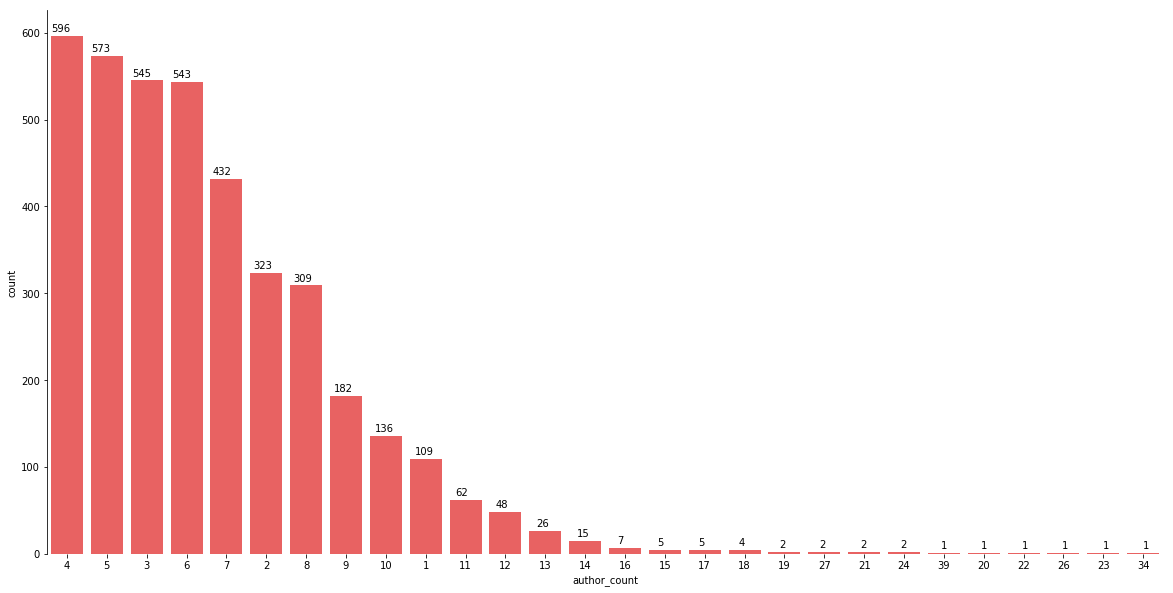

In [149]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.countplot(x = "author_count", data = number_of_author,\
             order = number_of_author['author_count'].value_counts().index,color='r',alpha=0.7)
sns.despine()
ax.spines['bottom'].set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() +5))
#plt.title("Product Distribution")
#plt.savefig("product.jpg", bbox_inches="tight")
plt.show();

In [151]:
df1_author.head()

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au29,au30,au31,au32,au33,au34,au35,au36,au37,au38
2362,"Blehm, Benjamin H.","Devine, Alexus","Staunton, Jack R.","Tanner, Kandice",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2363,"Wang, Xiaojian","Xu, Shanqing","Zhou, Shiwei","Xu, Wei","Leary, Martin","Choong, Peter","Qian, M.","Brandt, Milan","Xie, Yi Min",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2364,"Crowley, Claire","KlanritB, Poramate","Butler, Colin R.","Varanou, Aikaterini","Plate, Manuela","Hynds, Robert E.","Chambers, Rachel C.","Seifalian, Alexander M.","Birchall, Martin A.","Janes, Sam M.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2365,"Andre, Emilie M.","Passirani, Catherine","Seijo, Begona","Sanchez, Alejandro","Montero-Menei, Claudia N.",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2366,"Tang, Daniel","Tare, Rahul. S.","Yang, Liang-Yo","Williams, David F.","Ou, Keng-Liang","Oreffo, Richard O. C.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Save authors to txt**

In [207]:
df1_author.to_csv(r'../data/2016.txt', header=None, index=None, sep=';',mode='a')

In [218]:
df1_author.to_csv('../data/2016.csv', header=None, index=None)

**Load network from txt**

In [222]:
G = nx.read_adjlist('../data/2016.txt',delimiter=';',create_using=nx.DiGraph)

In [223]:
G.nodes()

NodeView(('Blehm, Benjamin H.', 'Devine, Alexus', 'Staunton, Jack R.', 'Tanner, Kandice', '', 'Wang, Xiaojian', 'Xu, Shanqing', 'Zhou, Shiwei', 'Xu, Wei', 'Leary, Martin', 'Choong, Peter', 'Qian, M.', 'Brandt, Milan', 'Xie, Yi Min', 'Crowley, Claire', 'KlanritB, Poramate', 'Butler, Colin R.', 'Varanou, Aikaterini', 'Plate, Manuela', 'Hynds, Robert E.', 'Chambers, Rachel C.', 'Seifalian, Alexander M.', 'Birchall, Martin A.', 'Janes, Sam M.', 'Andre, Emilie M.', 'Passirani, Catherine', 'Seijo, Begona', 'Sanchez, Alejandro', 'Montero-Menei, Claudia N.', 'Tang, Daniel', 'Tare, Rahul. S.', 'Yang, Liang-Yo', 'Williams, David F.', 'Ou, Keng-Liang', 'Oreffo, Richard O. C.', 'Milani, Stefano', 'Dal Pozzo, Laura', 'Rasperini, Giulio', 'Sforza, Chiarella', 'Dellavia, Claudia', 'Mustafa, Ammar', 'Lung, Christie Y. K.', 'Mustafa, Nazih S.', 'Mustafa, Besma A.', 'Kashmoola, Muhannad A.', 'Zwahlen, Roger A.', 'Matinlinna, Jukka P.', 'Nuraeva, Alla', 'Vasilev, Semen', 'Vasileva, Dania', 'Zelenovskiy, 

In [260]:
G.number_of_nodes(),G.number_of_edges()

(18313, 17386)

**Check the nodes and clean it**

In [225]:
list(G.nodes())

['Blehm, Benjamin H.',
 'Devine, Alexus',
 'Staunton, Jack R.',
 'Tanner, Kandice',
 '',
 'Wang, Xiaojian',
 'Xu, Shanqing',
 'Zhou, Shiwei',
 'Xu, Wei',
 'Leary, Martin',
 'Choong, Peter',
 'Qian, M.',
 'Brandt, Milan',
 'Xie, Yi Min',
 'Crowley, Claire',
 'KlanritB, Poramate',
 'Butler, Colin R.',
 'Varanou, Aikaterini',
 'Plate, Manuela',
 'Hynds, Robert E.',
 'Chambers, Rachel C.',
 'Seifalian, Alexander M.',
 'Birchall, Martin A.',
 'Janes, Sam M.',
 'Andre, Emilie M.',
 'Passirani, Catherine',
 'Seijo, Begona',
 'Sanchez, Alejandro',
 'Montero-Menei, Claudia N.',
 'Tang, Daniel',
 'Tare, Rahul. S.',
 'Yang, Liang-Yo',
 'Williams, David F.',
 'Ou, Keng-Liang',
 'Oreffo, Richard O. C.',
 'Milani, Stefano',
 'Dal Pozzo, Laura',
 'Rasperini, Giulio',
 'Sforza, Chiarella',
 'Dellavia, Claudia',
 'Mustafa, Ammar',
 'Lung, Christie Y. K.',
 'Mustafa, Nazih S.',
 'Mustafa, Besma A.',
 'Kashmoola, Muhannad A.',
 'Zwahlen, Roger A.',
 'Matinlinna, Jukka P.',
 'Nuraeva, Alla',
 'Vasilev, Se

In [226]:
G.remove_node('')

In [ ]:
G.number_of_nodes(),G.number_of_edges()

In [228]:
df1_author[df1_author['au0']=='Staunton, Jack R.']

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au29,au30,au31,au32,au33,au34,au35,au36,au37,au38
7349,"Staunton, Jack R.","Vieira, Wilfred","Fung, King Leung","Lake, Ross","Devine, Alexus","Tanner, Kandice",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check the network infomation

In [229]:
# edges of network
list(G.edges())

[('Blehm, Benjamin H.', 'Devine, Alexus'),
 ('Blehm, Benjamin H.', 'Staunton, Jack R.'),
 ('Blehm, Benjamin H.', 'Tanner, Kandice'),
 ('Staunton, Jack R.', 'Vieira, Wilfred'),
 ('Staunton, Jack R.', 'Fung, King Leung'),
 ('Staunton, Jack R.', 'Lake, Ross'),
 ('Staunton, Jack R.', 'Devine, Alexus'),
 ('Staunton, Jack R.', 'Tanner, Kandice'),
 ('Wang, Xiaojian', 'Xu, Shanqing'),
 ('Wang, Xiaojian', 'Zhou, Shiwei'),
 ('Wang, Xiaojian', 'Xu, Wei'),
 ('Wang, Xiaojian', 'Leary, Martin'),
 ('Wang, Xiaojian', 'Choong, Peter'),
 ('Wang, Xiaojian', 'Qian, M.'),
 ('Wang, Xiaojian', 'Brandt, Milan'),
 ('Wang, Xiaojian', 'Xie, Yi Min'),
 ('Crowley, Claire', 'KlanritB, Poramate'),
 ('Crowley, Claire', 'Butler, Colin R.'),
 ('Crowley, Claire', 'Varanou, Aikaterini'),
 ('Crowley, Claire', 'Plate, Manuela'),
 ('Crowley, Claire', 'Hynds, Robert E.'),
 ('Crowley, Claire', 'Chambers, Rachel C.'),
 ('Crowley, Claire', 'Seifalian, Alexander M.'),
 ('Crowley, Claire', 'Birchall, Martin A.'),
 ('Crowley, Clai

In [235]:
#edges for specific nodes 
G.edges('Staunton, Jack R.') 

OutEdgeDataView([('Staunton, Jack R.', 'Vieira, Wilfred'), ('Staunton, Jack R.', 'Fung, King Leung'), ('Staunton, Jack R.', 'Lake, Ross'), ('Staunton, Jack R.', 'Devine, Alexus'), ('Staunton, Jack R.', 'Tanner, Kandice')])

In [261]:
G.in_degree()

InDegreeView({'Blehm, Benjamin H.': 0, 'Devine, Alexus': 2, 'Staunton, Jack R.': 1, 'Tanner, Kandice': 2, 'Wang, Xiaojian': 0, 'Xu, Shanqing': 2, 'Zhou, Shiwei': 1, 'Xu, Wei': 3, 'Leary, Martin': 1, 'Choong, Peter': 2, 'Qian, M.': 1, 'Brandt, Milan': 1, 'Xie, Yi Min': 2, 'Crowley, Claire': 0, 'KlanritB, Poramate': 1, 'Butler, Colin R.': 1, 'Varanou, Aikaterini': 1, 'Plate, Manuela': 1, 'Hynds, Robert E.': 1, 'Chambers, Rachel C.': 1, 'Seifalian, Alexander M.': 4, 'Birchall, Martin A.': 2, 'Janes, Sam M.': 1, 'Andre, Emilie M.': 0, 'Passirani, Catherine': 1, 'Seijo, Begona': 1, 'Sanchez, Alejandro': 1, 'Montero-Menei, Claudia N.': 1, 'Tang, Daniel': 0, 'Tare, Rahul. S.': 1, 'Yang, Liang-Yo': 1, 'Williams, David F.': 1, 'Ou, Keng-Liang': 3, 'Oreffo, Richard O. C.': 2, 'Milani, Stefano': 0, 'Dal Pozzo, Laura': 1, 'Rasperini, Giulio': 1, 'Sforza, Chiarella': 1, 'Dellavia, Claudia': 1, 'Mustafa, Ammar': 0, 'Lung, Christie Y. K.': 1, 'Mustafa, Nazih S.': 1, 'Mustafa, Besma A.': 1, 'Kashmoola

In [231]:
G.degree()

DiDegreeView({'Blehm, Benjamin H.': 3, 'Devine, Alexus': 2, 'Staunton, Jack R.': 6, 'Tanner, Kandice': 2, 'Wang, Xiaojian': 8, 'Xu, Shanqing': 2, 'Zhou, Shiwei': 1, 'Xu, Wei': 3, 'Leary, Martin': 1, 'Choong, Peter': 2, 'Qian, M.': 1, 'Brandt, Milan': 1, 'Xie, Yi Min': 2, 'Crowley, Claire': 9, 'KlanritB, Poramate': 1, 'Butler, Colin R.': 1, 'Varanou, Aikaterini': 1, 'Plate, Manuela': 1, 'Hynds, Robert E.': 1, 'Chambers, Rachel C.': 1, 'Seifalian, Alexander M.': 4, 'Birchall, Martin A.': 2, 'Janes, Sam M.': 1, 'Andre, Emilie M.': 4, 'Passirani, Catherine': 1, 'Seijo, Begona': 1, 'Sanchez, Alejandro': 1, 'Montero-Menei, Claudia N.': 1, 'Tang, Daniel': 5, 'Tare, Rahul. S.': 1, 'Yang, Liang-Yo': 1, 'Williams, David F.': 1, 'Ou, Keng-Liang': 3, 'Oreffo, Richard O. C.': 2, 'Milani, Stefano': 4, 'Dal Pozzo, Laura': 1, 'Rasperini, Giulio': 1, 'Sforza, Chiarella': 1, 'Dellavia, Claudia': 1, 'Mustafa, Ammar': 6, 'Lung, Christie Y. K.': 1, 'Mustafa, Nazih S.': 1, 'Mustafa, Besma A.': 1, 'Kashmoola

In [257]:
G.in_degree('Staunton, Jack R.'),G.out_degree('Staunton, Jack R.'),G.degree('Staunton, Jack R.')

(1, 5, 6)

In [265]:
df_edges = pd.DataFrame(list(G.edges), columns=['author1', 'author2'])

In [267]:
df_nodes = pd.DataFrame(list(G.nodes), columns=['author'])

# Calculate the centraility

In [248]:
closeCent = nx.closeness_centrality(G)
closesort=sorted(closeCent.items(),key=operator.itemgetter(1),reverse=True)
df_close = pd.DataFrame(closesort)
df_close1=df_close.head(10)
#topbtw=df1['business_id'].values.tolist()
#topbtw
#df1

In [250]:
df_close.head(10)

,0,1
0,"Kaplan, David L.",0.001553
1,"Khademhosseini, Ali",0.001166
2,"Langer, Robert",0.001152
3,"Reis, Rui L.",0.000963
4,"Vacanti, Joseph",0.000814
5,"Boccaccini, Aldo R.",0.000551
6,"Mano, Joao F.",0.000546
7,"Gaharwar, Akhilesh K.",0.000546
8,"Zheng, Yufeng",0.000513
9,"Chu, Paul K.",0.000510


In [273]:
degree = nx.degree_centrality(G)
between = nx.betweenness_centrality(G)
close = nx.closeness_centrality(G)
eigen = nx.eigenvector_centrality(G)

## print the multiple centrality metrics to a single line for each node:
#for n in G:
#    print ("%d, %f, %f, %f, %f"%(n, degree[n], between[n], close[n], eigen[n]))

In [281]:
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)

In [282]:
lst=[]
for n in G:
    lst.append([n,degree[n], indegree[n], outdegree[n], between[n], close[n], eigen[n]])
df_nodes = pd.DataFrame(lst)
df_nodes.columns=['author','degree', 'indegree', 'outdegree','between','close','eigen']

In [283]:
df_nodes

,author,degree,indegree,outdegree,between,close,eigen
0,"Blehm, Benjamin H.",0.000164,0.000000,0.000164,0.000000e+00,0.000000,2.384791e-12
1,"Devine, Alexus",0.000109,0.000109,0.000000,0.000000e+00,0.000109,5.008062e-10
2,"Staunton, Jack R.",0.000328,0.000055,0.000273,8.946917e-09,0.000055,4.769583e-11
3,"Tanner, Kandice",0.000109,0.000109,0.000000,0.000000e+00,0.000109,5.008062e-10
4,"Wang, Xiaojian",0.000437,0.000000,0.000437,0.000000e+00,0.000000,2.384791e-12
5,"Xu, Shanqing",0.000109,0.000109,0.000000,0.000000e+00,0.000109,9.300686e-11
6,"Zhou, Shiwei",0.000055,0.000055,0.000000,0.000000e+00,0.000055,4.769583e-11
7,"Xu, Wei",0.000164,0.000164,0.000000,0.000000e+00,0.000164,1.383179e-10
8,"Leary, Martin",0.000055,0.000055,0.000000,0.000000e+00,0.000055,4.769583e-11
9,"Choong, Peter",0.000109,0.000109,0.000000,0.000000e+00,0.000109,9.300686e-11
